In [149]:
#first trying with 15% migration data, metapop replicate1, patch 1
patch_1_mig15_replicate_1 = [12, 93, 113, 5, 76, 1, 19, 108, 40, 127, 83, 15, 32, 1, 104, 16, 24, 113, 6, 62, 1, 97, 2, 48, 0, 0]
patch_2_mig15_replicate_1 = [16, 9, 90, 7, 53, 9, 15, 23, 82, 22, 77, 18, 73, 1, 107, 28, 50, 122, 0, 0, 133, 25, 60, 110, 5, 47]

patch_1_mig15_replicate_2 = [14, 5, 22, 19, 48, 7, 52, 6, 32, 7, 68, 46, 34, 77, 55, 61, 3, 0, 18, 1, 66, 1, 54, 24, 106, 6]
patch_2_mig15_replicate_2 = [17, 12, 47, 13, 66, 2, 21, 0, 0, 62, 2, 52, 1, 26, 49, 35, 4, 40, 19, 68, 1, 64, 15, 79, 7, 83]

patch_1_mig15_replicate_3 = [13, 5, 65, 4, 18, 8, 99, 7, 102, 19, 26, 6, 35, 0, 90, 14, 108, 3, 37, 6, 26, 21, 147, 3, 65, 0]
patch_2_mig15_replicate_3 = [18, 15, 31, 7, 65, 8, 99, 3, 88, 10, 25, 19, 45, 2, 107, 13, 110, 8, 136, 7, 18, 3, 96, 3, 0, 127]

patch_1_mig15_replicate_4 = [17, 18, 59, 3, 14, 122, 8, 80, 3, 38, 19, 96, 3, 19, 46, 92, 6, 0, 72, 5, 116, 7, 95, 6, 119, 11]
patch_2_mig15_replicate_4 = [19, 6, 98, 1, 0, 49, 10, 68, 19, 96, 12, 98, 6, 83, 34, 98, 3, 27, 20, 94, 6, 71, 62, 4, 13, 90]




In [150]:
#making a function that extracts female migration data from the patch1, patch2 data
migration_rate = 0.15
def female_post_migration_time_series_data(patch_1_data, patch_2_data, migration_rate):

    number_of_generations_considered = len(patch_1_data)

    patch_1_data_only_females = [round(k/2) for k in patch_1_data]
    patch_2_data_only_females = [round(k/2) for k in patch_2_data]


    patch_1_female_post_migration_data = []
    patch_2_female_post_migration_data = []

    for k in range(number_of_generations_considered):

        patch_1_female_post_migration_population = round(patch_1_data_only_females[k]*(1 - migration_rate/2) + patch_2_data_only_females[k]*(migration_rate/2))

        patch_2_female_post_migration_population = round(patch_2_data_only_females[k]*(1 - migration_rate) + patch_1_data_only_females[k]*(migration_rate/2))
        patch_1_female_post_migration_data.append(patch_1_female_post_migration_population)
        patch_2_female_post_migration_data.append(patch_2_female_post_migration_population)

    return patch_1_female_post_migration_data, patch_2_female_post_migration_data



#test this function out

In [151]:
#run the function for each replicate
#append all female migration data (append after removing the last entry)
#append all patch data (aappend after removing the first entry)


#do scatter plot wiyh combined migration and comined patch data 


patch_1_mig15_replicate_1_female_post_migration, patch_2_mig15_replicate_1_female_post_migration = female_post_migration_time_series_data(patch_1_mig15_replicate_1, patch_2_mig15_replicate_1, migration_rate)
patch_1_mig15_replicate_2_female_post_migration, patch_2_mig15_replicate_2_female_post_migration = female_post_migration_time_series_data(patch_1_mig15_replicate_2, patch_2_mig15_replicate_2, migration_rate)
patch_1_mig15_replicate_3_female_post_migration, patch_2_mig15_replicate_3_female_post_migration = female_post_migration_time_series_data(patch_1_mig15_replicate_3, patch_2_mig15_replicate_3, migration_rate)
patch_1_mig15_replicate_4_female_post_migration, patch_2_mig15_replicate_4_female_post_migration = female_post_migration_time_series_data(patch_1_mig15_replicate_4, patch_2_mig15_replicate_4, migration_rate)



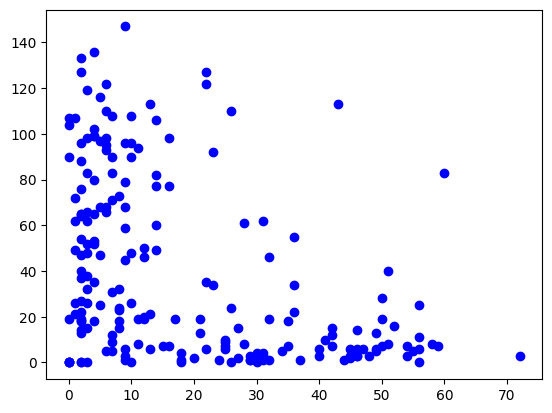

In [152]:
import matplotlib.pyplot as plt


plt.scatter(patch_1_mig15_replicate_1_female_post_migration[:- 1], patch_1_mig15_replicate_1[1:], color = 'blue')
plt.scatter(patch_2_mig15_replicate_1_female_post_migration[:- 1], patch_2_mig15_replicate_1[1:], color = 'blue')


plt.scatter(patch_1_mig15_replicate_2_female_post_migration[:- 1], patch_1_mig15_replicate_2[1:], color = 'blue')
plt.scatter(patch_2_mig15_replicate_2_female_post_migration[:- 1], patch_2_mig15_replicate_2[1:], color = 'blue')


plt.scatter(patch_1_mig15_replicate_3_female_post_migration[:- 1], patch_1_mig15_replicate_3[1:], color = 'blue')
plt.scatter(patch_2_mig15_replicate_3_female_post_migration[:- 1], patch_2_mig15_replicate_3[1:], color = 'blue')


plt.scatter(patch_1_mig15_replicate_4_female_post_migration[:- 1], patch_1_mig15_replicate_4[1:], color = 'blue')
plt.scatter(patch_2_mig15_replicate_4_female_post_migration[:- 1], patch_2_mig15_replicate_4[1:], color = 'blue')

plt.show()

SIMULATION

Experimental data has the above relation between number of females post migration and number of adults (pre-migration census)
Seeing if simulation will produce the samme relation

(how to check? - for the time being checking visually

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.stats as stats
import itertools as it
import math 
import pandas as pd
import random as random

In [154]:
##define the fixed parameters
hatchability = 0.98  #if hatchability is density (egg or adult) depedent, then define it in the pre-adult-module or the adult-module functions 
x1 = 2.5  #parameter in finding the mean larval size
x2 = 1  #parameter in finding the mean larval size 
x3 = 0.009 #parameter in finding the mean larval size 
sigma_size = 0.45  #parameter in assigning larval sizes by drawing from a normal distribution
mc = 1.1 #critical size cut off of the larval stage for successful pupation (= 1.1 (JB) and 1 (FEJ))
x4 = 1.0  #parameter in finding the adult sizes
female_proportion = 0.5 #assign sex to the adutls 
x5 = 85 #parameter in finding fecundity
x6 = 2  #parameter in finding fecundity
sen_adsize = 1.7 #parameter related to sensivity of fecundity to adult size
sen_adden = 0.17 #parameter related to sensivity of fecundity to adult denisity
f = 0#migration rate

In [155]:
##Pre-Adult-Module
#food = larval food amt; 1.76 (LL and LH), 2.56 (HL and HH) 


def Pre_Adult_Module(numegg,food):

    numlarva = int(hatchability*numegg)
    mean_size = x1*(1-1/(x2+np.exp(-x3*numlarva+food)))
    size_larva_arr = abs(np.random.normal(mean_size, sigma_size, numlarva))
    numadult = (size_larva_arr>=mc).sum()
    size_adult_arr = x4*size_larva_arr[size_larva_arr>=mc]
    return numadult, size_adult_arr

Tbh, I can't give the females any random set of values. Females sizes are biased to be larger if they came from a patch that had very few eggs. 

But I'll make the simplyifing assumption that number of larave are 80 irrespective to get okayish distribution (not too small nor too large)


Caveat: Since there is migration here. Ex: number of females in patch 1 might be 20 (so I will give size distribution with moderate mean). But some of may have come by migration with a patch that had very eggs

But guess it's okay, coz if they came from a place with few females they might make only 2 or 3 of the 20

Or, patch 1 may have been 20 (nearly extinction in patch 1), all 20 may have come from patch 2 (which had 150 eggs). So it needs to be much smaller but I am giving it average size

(I will probably need to check sensititivity -> how much does the female size affect the number of adults)

In [156]:
##Pre-Adult-Module
#food = larval food amt; 1.76 (LL and LH), 2.56 (HL and HH) 

#assume there are 100 larvae
number_of_larvae_assumption = 80
food = 1.76
def generating_females_size_array(number_of_females):

    mean_size = x1*(1-1/(x2+np.exp(-x3*number_of_larvae_assumption+food)))

    #same mean size as the larval stage function

    distribution_of_female_sizes = abs(np.random.normal(mean_size, sigma_size, 10*number_of_females))      #make a large distribution of female sizes
    distribution_of_female_sizes_above_mc = x4*distribution_of_female_sizes[distribution_of_female_sizes>=mc] #choose only the ones above mc


    randomly_chosen_female_size_distribution = random.sample(distribution_of_female_sizes_above_mc.tolist(), number_of_females)
    #out of the large array pick the required number of females
    return np.array(randomly_chosen_female_size_distribution)



In [157]:
#now female will lay eggs (according to adult module)

##Adult-Module
#adnut = #adult food nutrition quality; 1 (LL and HL), 1.29 (HH) and 1.49 (LH)

adnut = 1


def Adult_Module(size_female_arr):

    #assumption that number of adult is twice the number of females
    
    numadult = 2*len(size_female_arr)

    addens_ind_fec_arr = adnut*x5*np.log(x6+sen_adsize*size_female_arr)
    addens_eff = 1/(1+sen_adden*numadult)
    fecundity_arr = addens_eff*addens_ind_fec_arr
    fecundity_arr = fecundity_arr.astype(int)
    numegg = fecundity_arr.sum()
    return numegg


#out of eggs use pre-adult module to get number of adults

##Pre-Adult-Module
#food = larval food amt; 1.76 (LL and LH), 2.56 (HL and HH) 

def Pre_Adult_Module(numegg):
    """  
This function takes the number of eggs in gen t and larval food amount as input and returns the number of adults in gen t and their size distribution as output.

Args: 
    numegg (int): number of eggs in generation t
    food (float): larval food amount in ml

Returns:
    numadult (int): number of adults in generation t
    size_adult_arr (array): size distribution of adults in generation t
"""
    numlarva = int(hatchability*numegg)
    mean_size = x1*(1-1/(x2+np.exp(-x3*numlarva+food)))
    size_larva_arr = abs(np.random.normal(mean_size, sigma_size, numlarva))
    numadult = (size_larva_arr>=mc).sum()
    # size_adult_arr = x4*size_larva_arr[size_larva_arr>=mc]
    return numadult



In [158]:
#function that will combine all these three. Females -> Assign Sizes -> females eggs -> larave -> adults
#check adults in the next generation

def simulation_females_post_migration_to_number_of_adults(number_of_females):

   female_size_array =  generating_females_size_array(number_of_females)
   number_of_eggs =  Adult_Module(female_size_array)
   number_of_adults = Pre_Adult_Module(number_of_eggs)

   return number_of_adults


def simulation_avg_output_post_migration_to_number_of_adults(number_of_females):
   total = 0
   for x in range(0,50):
      number_of_adults = simulation_females_post_migration_to_number_of_adults(number_of_females)
      total = total + number_of_adults
   average_number_of_adults = total/50

   return average_number_of_adults

print(simulation_avg_output_post_migration_to_number_of_adults(10))

52.94


In [159]:
#given patch migration data from experiment what will simulation predict

simulated_patch_1_mig15_replicate_1= [simulation_avg_output_post_migration_to_number_of_adults(x) for x in patch_1_mig15_replicate_1_female_post_migration[:- 1]]
simulated_patch_2_mig15_replicate_1= [simulation_avg_output_post_migration_to_number_of_adults(x) for x in patch_1_mig15_replicate_2_female_post_migration[:- 1]]

print(len(simulated_patch_1_mig15_replicate_1))
print(simulated_patch_1_mig15_replicate_1)


25
[82.04, 29.46, 29.62, 125.7, 30.82, 0.0, 52.82, 30.9, 33.48, 30.34, 29.34, 62.2, 36.18, 0.0, 29.12, 63.88, 42.74, 30.66, 121.68, 32.14, 92.16, 29.78, 120.14, 33.0, 0.0]


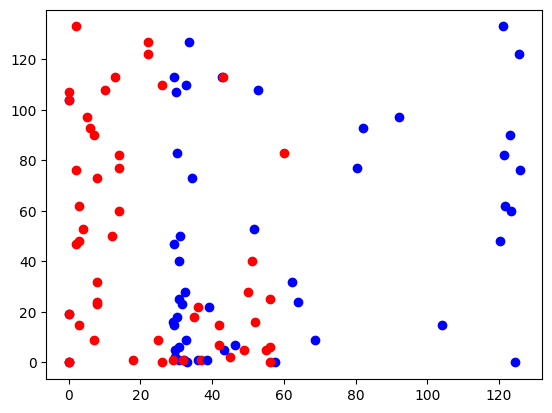

In [160]:
plt.scatter(simulated_patch_1_mig15_replicate_1, patch_1_mig15_replicate_1[1:], color = 'blue')
plt.scatter(patch_1_mig15_replicate_1_female_post_migration[:- 1], patch_1_mig15_replicate_1[1:], color = 'red')

plt.scatter(simulated_patch_2_mig15_replicate_1, patch_2_mig15_replicate_1[1:], color = 'blue')
plt.scatter(patch_2_mig15_replicate_1_female_post_migration[:- 1], patch_2_mig15_replicate_1[1:], color = 'red')

plt.show()




{'whiskers': [<matplotlib.lines.Line2D at 0x272bf83e990>,
 'caps': [<matplotlib.lines.Line2D at 0x272bf83fcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x272bf83e010>,
 'medians': [<matplotlib.lines.Line2D at 0x272bf848e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x272bf848d10>,
 'means': []}

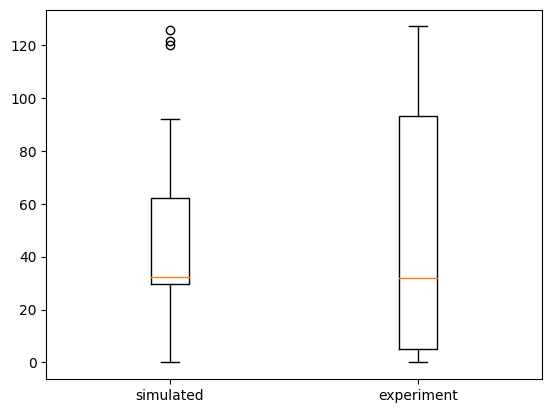

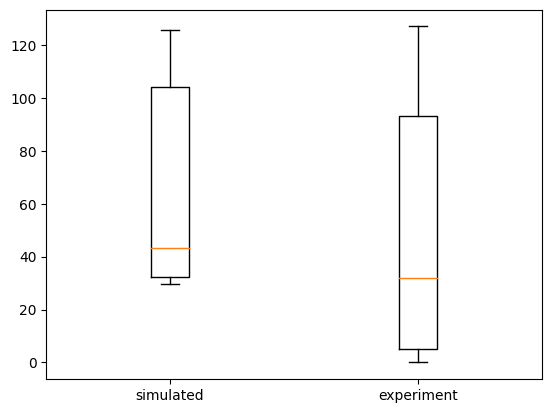

In [161]:
#plotting boxplots - comparing simulated time series vs experimenatal time series

labels = ['simulated', 'experiment']

simulated_vs_experiment_data_patch_1_replicate_1 = [simulated_patch_1_mig15_replicate_1, patch_1_mig15_replicate_1[1:]]
plt.boxplot(simulated_vs_experiment_data_patch_1_replicate_1, labels = labels)

plt.figure()
simulated_vs_experiment_data_patch_2_replicate_1 = [simulated_patch_2_mig15_replicate_1,  patch_1_mig15_replicate_1[1:]]
plt.boxplot(simulated_vs_experiment_data_patch_2_replicate_1, labels = labels)
